# Diabetic Retinopathy Detection with Federated Learning Approach

This project outlines the methodology employed in the development of a
multi-class classification system tailored for detecting diabetic retinopathy from retina images.
By integrating state-of-the-art image processing techniques and harnessing the capabilities of
convolutional neural networks (CNNs), the project seeks to compare the distributed learning
approach and traditional approach to diabetic retinopathy detection. Through systematic
analysis of retina images, the system enhances the accuracy and efficacy of disease detection,
enabling timely intervention and proactive management of any health risk.

In this project we have chosen a "bad" dataset on purpose to apply different techniques and try to process it to learn how get the best of any dataset and approach the real-life case. 

NB: This project was coded on the Kaggle notebooks.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
   # for filename in filenames:
       # print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split

In [3]:
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import collections
import random

  
As the dataset is organized into seperate folders, we will normalize and save the images by iterating through each class folder


In [7]:
dataset_path = "/kaggle/input/diabetes-retinopathy/FOLD 1/TRAIN"

# Create a dictionary to map class names to numerical labels
class_dict = {"no_DR": 0, "mild": 1, "moderate": 2, "proliferative": 3, "severe": 4}

# Iterate through each class folder
for class_folder in class_dict.keys():
    class_path = os.path.join(dataset_path, class_folder)
    save_dir =  os.path.join("/kaggle/working/Train", class_folder)
    os.makedirs(save_dir, exist_ok=True)
    # Iterate through each image in the class folder
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        

        # Load the image using cv2
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        img = cv2.resize(img, (224, 224))  # Resize as needed
        img = img/255.0
        # Save the augmented image
        save_path = os.path.join(save_dir, image_file)
        plt.imsave(save_path, img)


dataset_path = "/kaggle/input/diabetes-retinopathy/FOLD 1/TEST"

# Iterate through each class folder
for class_folder in class_dict.keys():
    class_path = os.path.join(dataset_path, class_folder)
    save_dir =  os.path.join("/kaggle/working/Test", class_folder)
    os.makedirs(save_dir, exist_ok=True)
    # Iterate through each image in the class folder
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        

        # Load the image using cv2
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        img = cv2.resize(img, (224, 224))  # Resize as needed
        img = img/255.0
        # Save the augmented image
        save_path = os.path.join(save_dir, image_file)
        plt.imsave(save_path, img)


KeyboardInterrupt: 

In [ ]:

# Set the path to your dataset
class_path = "/kaggle/input/diabetes-retinopathy/FOLD 1/TRAIN/no_DR"
save_dir = "/kaggle/working/Train/no_DR"
i=0
for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        # Load the image using cv2
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        img = cv2.resize(img, (224, 224))  # Resize as needed
        img = img/255.0
        # Save the augmented image
        save_path = os.path.join(save_dir, image_file)
        plt.imsave(save_path, img)
        i+=1
        if i==8000:
            break


In [6]:

# Replace 'your_base_directory' with the actual path to your base directory
base_directory = '/kaggle/working/'

# List all subdirectories in the base directory
subdirectories = [d for d in os.listdir(base_directory) if os.path.isdir(os.path.join(base_directory, d))]
print(subdirectories)
# Dictionary to store folder names and their respective image counts
folder_image_counts = {}

plt.figure(figsize=(10, 8))
i=0
# Iterate through subdirectories
for subdirectory in subdirectories:
    
    folder_path = os.path.join(base_directory, subdirectory)  # Adjust 'TRAIN' or 'TEST' accordingly
    print(folder_path)
    subsubdirectories = [d for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]
    print(subsubdirectories)
    folder_names = []
    num_images = []
    for subsubdirectory in subsubdirectories:
        folder_path_1 = os.path.join(folder_path, subsubdirectory)  # Adjust 'TRAIN' or 'TEST' accordingly
        
        image_files = [f for f in os.listdir(folder_path_1) if f.endswith('.png')]
        number_images = len(image_files)
        folder_image_counts[subsubdirectory] = number_images
        num_images.append(len(image_files))
        folder_names.append(subsubdirectory)
    # Create a bar graph
        
    i+=1
    plt.subplot(2, 2, i)
    plt.bar(folder_image_counts.keys(), folder_image_counts.values())
    plt.xlabel(subdirectory)
    plt.ylabel('Number of Images')
    plt.title('Number of Images in each folder')
    #plt.show()
    i+=1
    # Create a pie chart
    plt.subplot(2, 2, i)
    plt.pie(num_images, labels=folder_names, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
    plt.title(subdirectory)
    #plt.show()
    
plt.tight_layout()
plt.show()

['Train', 'resnet-50', 'Test', '.virtual_documents', 'VGG19']
/kaggle/working/Train
['no_DR', 'mild', 'severe', 'proliferative', 'moderate']
/kaggle/working/resnet-50
['assets', 'variables']


/opt/conda/lib/python3.10/site-packages/matplotlib/axes/_axes.py:3193: RuntimeWarning: invalid value encountered in divide
  x = x / sx


ValueError: cannot convert float NaN to integer

ValueError: need at least one array to concatenate

<Figure size 1000x800 with 4 Axes>

 **=>Here, we can notice that our data is imbalanced and the images labeled as "no_DR" represent 73.5% of our data. For that, we need to make it more balanced for a better results later. We'll aim to perform data augmentation.**

# 3- Perform data augmentation 

**Let's perform data augmentation for each class seperately**


* **Class 0: No_DR**


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create an instance of the ImageDataGenerator with desired augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.4,
    horizontal_flip=True,
    fill_mode='nearest'
)
# Directory with original images
original_images_dir = "/kaggle/input/diabetes-retinopathy/FOLD 1/TRAIN/no_DR"

# Directory to save augmented images
save_dir = "/kaggle/working/Train/no_DR"

# List all image files in the original images directory
image_files = [f for f in os.listdir(original_images_dir) if f.endswith(".png")]

# Generate and save augmented images
num_augmented_images = 4
class_number = 0

# Counter to limit the number of saved images
save_count = 0

for image_file in image_files:
    image_path = os.path.join(original_images_dir, image_file)

    # Load the image using cv2
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = img / 255.0  # Normalize the image to [0, 1]

    # Reshape the image to (1, height, width, channels) to fit the ImageDataGenerator
    image = np.expand_dims(img, axis=0)

    if save_count < 2000:  # Limit the number of saved images
        # Generate augmented images
        for _ in range(num_augmented_images):
            augmented_image = datagen.flow(image, batch_size=1)[0][0]

            # Save the augmented image
            save_path = os.path.join(save_dir, f"AugmentedImage{save_count}.png")
            plt.imsave(save_path, augmented_image)
            save_count += 1

print(f"{save_count} augmented images saved in {save_dir}")


* **Class 1: Mild**


In [ ]:
# Directory with original images
original_images_dir = "/kaggle/input/diabetes-retinopathy/FOLD 1/TRAIN/mild"

# Directory to save augmented images
save_dir = "/kaggle/working/Train/mild"

# List all image files in the original images directory
image_files = [f for f in os.listdir(original_images_dir) if f.endswith(".png")]

# Generate and save augmented images
num_augmented_images = 4
class_number = 1

# Counter to limit the number of saved images
save_count = 0

for image_file in image_files:
    image_path = os.path.join(original_images_dir, image_file)

    # Load the image using cv2
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = img / 255.0  # Normalize the image to [0, 1]

    # Reshape the image to (1, height, width, channels) to fit the ImageDataGenerator
    image = np.expand_dims(img, axis=0)

    if save_count < 2000:  # Limit the number of saved images
        # Generate augmented images
        for _ in range(num_augmented_images):
            augmented_image = datagen.flow(image, batch_size=1)[0][0]

            # Save the augmented image
            save_path = os.path.join(save_dir, f"AugmentedImage{save_count}.png")
            plt.imsave(save_path, augmented_image)
            save_count += 1

print(f"{save_count} augmented images saved in {save_dir}")

* **Class 2: Moderate**

In [ ]:
# Directory with original images
original_images_dir = "/kaggle/input/diabetes-retinopathy/FOLD 1/TRAIN/moderate"

# Directory to save augmented images
save_dir = "/kaggle/working/Train/moderate"

# List all image files in the original images directory
image_files = [f for f in os.listdir(original_images_dir) if f.endswith(".png")]

# Generate and save augmented images
num_augmented_images = 4
class_number = 2

# Counter to limit the number of saved images
save_count = 0

for image_file in image_files:
    image_path = os.path.join(original_images_dir, image_file)

    # Load the image using cv2
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = img / 255.0  # Normalize the image to [0, 1]

    # Reshape the image to (1, height, width, channels) to fit the ImageDataGenerator
    image = np.expand_dims(img, axis=0)

    if save_count < 2000:  # Limit the number of saved images
        # Generate augmented images
        for _ in range(num_augmented_images):
            augmented_image = datagen.flow(image, batch_size=1)[0][0]

            # Save the augmented image
            save_path = os.path.join(save_dir, f"AugmentedImage{save_count}.png")
            plt.imsave(save_path, augmented_image)
            save_count += 1

print(f"{save_count} augmented images saved in {save_dir}")


* **Class 3: proliferative** 

In [ ]:
# Directory with original images
original_images_dir = "/kaggle/input/diabetes-retinopathy/FOLD 1/TRAIN/proliferative"

# Directory to save augmented images
save_dir = "/kaggle/working/Train/proliferative"

# List all image files in the original images directory
image_files = [f for f in os.listdir(original_images_dir) if f.endswith(".png")]

# Generate and save augmented images
num_augmented_images = 4
class_number = 3

# Counter to limit the number of saved images
save_count = 0

for image_file in image_files:
    image_path = os.path.join(original_images_dir, image_file)

    # Load the image using cv2
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = img / 255.0  # Normalize the image to [0, 1]

    # Reshape the image to (1, height, width, channels) to fit the ImageDataGenerator
    image = np.expand_dims(img, axis=0)

    if save_count < 2000:  # Limit the number of saved images
        # Generate augmented images
        for _ in range(num_augmented_images):
            augmented_image = datagen.flow(image, batch_size=1)[0][0]

            # Save the augmented image
            save_path = os.path.join(save_dir, f"AugmentedImage{save_count}.png")
            plt.imsave(save_path, augmented_image)
            save_count += 1

print(f"{save_count} augmented images saved in {save_dir}")

* **Class 4: Severe**

In [ ]:
# Directory with original images
original_images_dir = "/kaggle/input/diabetes-retinopathy/FOLD 1/TRAIN/severe"

# Directory to save augmented images
save_dir = "/kaggle/working/Train/severe"

# List all image files in the original images directory
image_files = [f for f in os.listdir(original_images_dir) if f.endswith(".png")]

# Generate and save augmented images
num_augmented_images = 4
class_number = 4

# Counter to limit the number of saved images
save_count = 0

for image_file in image_files:
    image_path = os.path.join(original_images_dir, image_file)

    # Load the image using cv2
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = img / 255.0  # Normalize the image to [0, 1]

    # Reshape the image to (1, height, width, channels) to fit the ImageDataGenerator
    image = np.expand_dims(img, axis=0)

    if save_count < 2000:  # Limit the number of saved images
        # Generate augmented images
        for _ in range(num_augmented_images):
            augmented_image = datagen.flow(image, batch_size=1)[0][0]

            # Save the augmented image
            save_path = os.path.join(save_dir, f"AugmentedImage{save_count}.png")
            plt.imsave(save_path, augmented_image)
            save_count += 1

print(f"{save_count} augmented images saved in {save_dir}")


Now that the data augmentation is Performed, we will visualize the classes and see the new class distribution

['no_DR', 'mild', 'severe', 'proliferative', 'moderate']
/kaggle/working/Train/no_DR
/kaggle/working/Train/mild
/kaggle/working/Train/severe
/kaggle/working/Train/proliferative
/kaggle/working/Train/moderate
{'no_DR': 12000, 'mild': 8955, 'severe': 7698, 'proliferative': 7566, 'moderate': 8234}


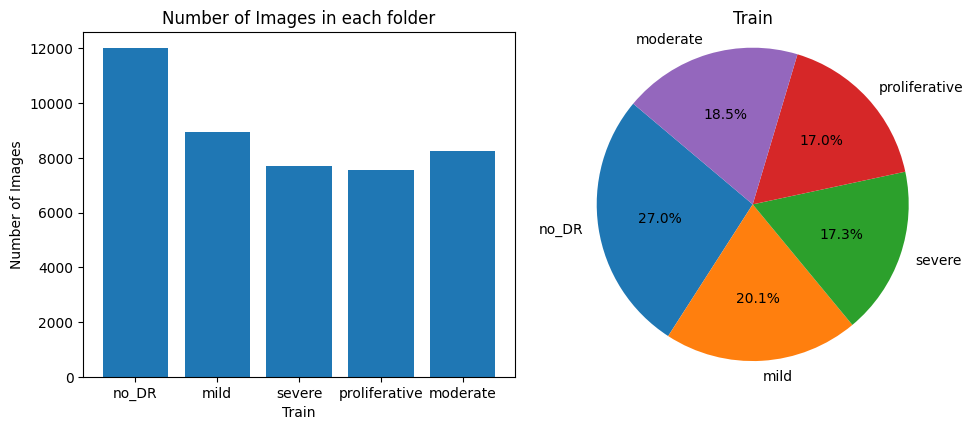

In [5]:
# Replace 'your_base_directory' with the actual path to your base directory
base_directory = '/kaggle/working/Train'

# List all subdirectories in the base directory
subdirectories = [d for d in os.listdir(base_directory) if os.path.isdir(os.path.join(base_directory, d))]
print(subdirectories)
# Dictionary to store folder names and their respective image counts
folder_image_counts = {}

plt.figure(figsize=(10, 8))
i=0

folder_names = []
num_images = []  
# Iterate through subdirectories
for subdirectory in subdirectories:
    
    folder_path = os.path.join(base_directory, subdirectory)  # Adjust 'TRAIN' or 'TEST' accordingly
    print(folder_path)
        
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.png')]
    number_images = len(image_files)
    folder_image_counts[subdirectory] = number_images
    num_images.append(len(image_files))
    folder_names.append(subdirectory)
    # Create a bar graph
        
print(folder_image_counts)    
plt.subplot(2, 2, 1)
plt.bar(folder_image_counts.keys(), folder_image_counts.values())
plt.xlabel("Train")
plt.ylabel('Number of Images')
plt.title('Number of Images in each folder')
    #plt.show()
    
    # Create a pie chart
plt.subplot(2, 2, 2)
plt.pie(num_images, labels=folder_names, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.title("Train")
    #plt.show()
    
plt.tight_layout()
plt.show()

In [5]:
img_height,img_width=224,224
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

KeyboardInterrupt: 

In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 28101 files belonging to 5 classes.
Using 5620 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['mild', 'moderate', 'no_DR', 'proliferative', 'severe']


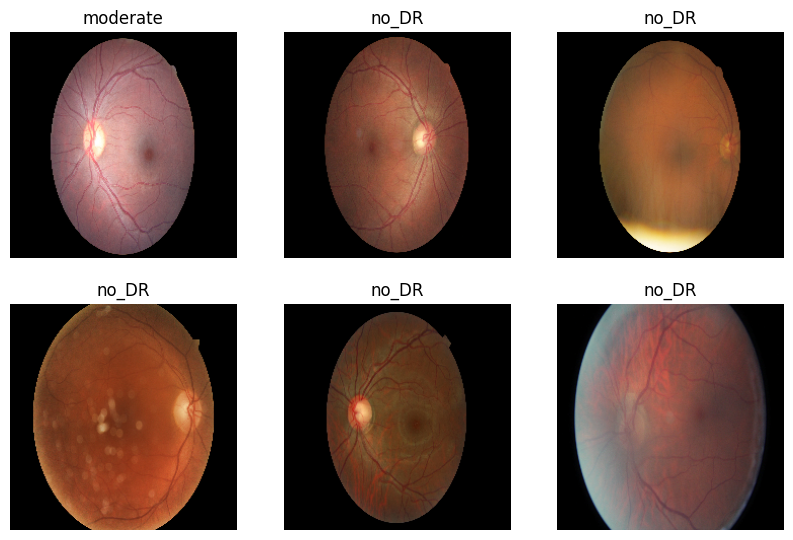

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# PREPROCESSING

In [5]:
IMG_SIZE = 224
def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
    #         print(img1.shape,img2.shape,img3.shape)
            img = np.stack([img1,img2,img3],axis=-1)
    #         print(img.shape)
        return img

In [6]:
def load_ben_color(image, sigmaX=10):
    #image = cv2.imread(path)
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = crop_image_from_gray(image)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))

    image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , sigmaX) ,-4 ,128)
       
    return image

In [7]:
#gaussian blur
def preprocessing2(img):
    img_ben = cv2.addWeighted(img, 4, cv2.GaussianBlur(img, (0, 0), 10), -4, 128)
    return img_ben



(224, 224, 3)


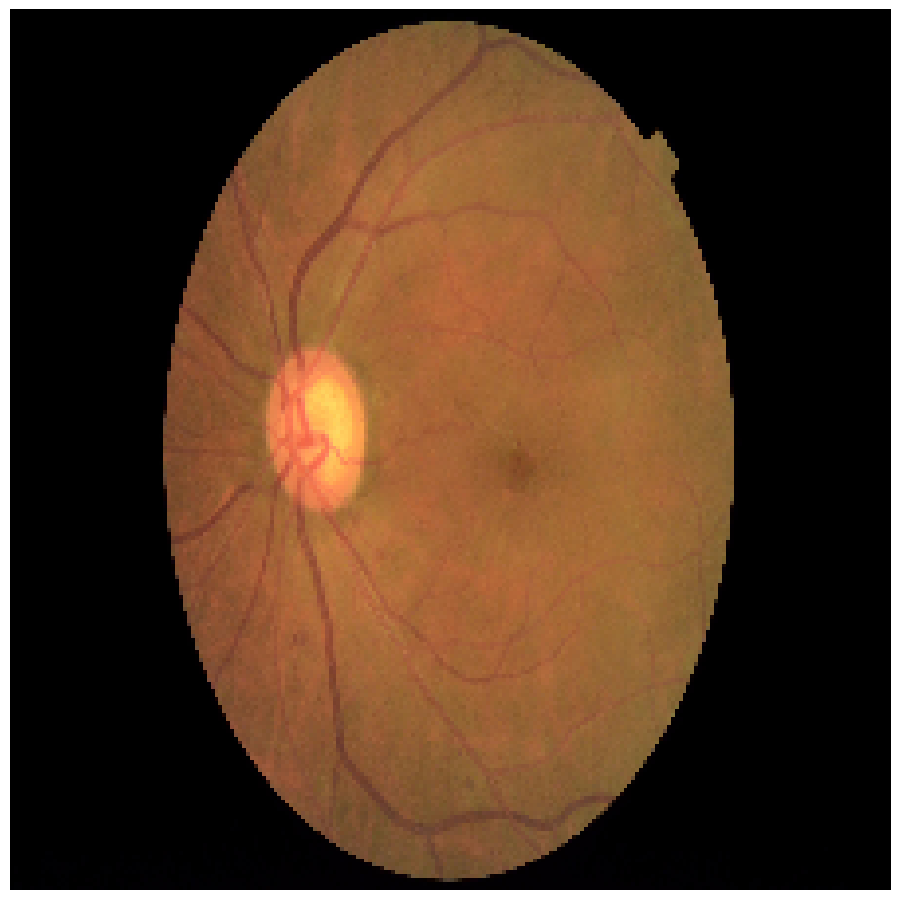

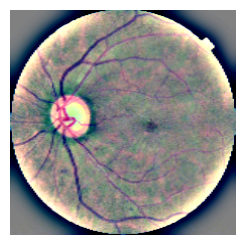

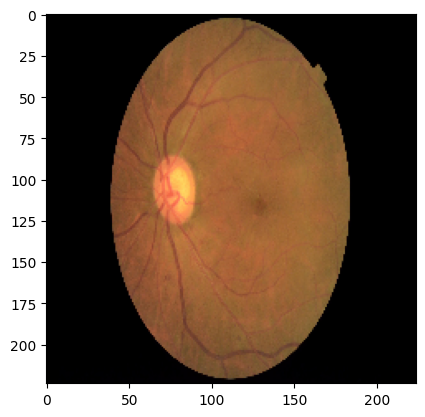

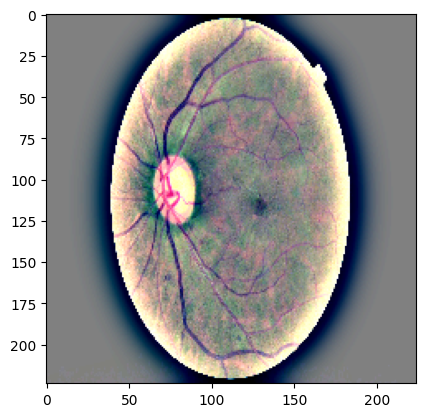

In [8]:
fig = plt.figure(figsize=(25, 16))
path1= "/kaggle/working/Train/severe/39575_left.png"
image = cv2.imread(path1)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_preprocess = load_ben_color(image_rgb)
print(image_preprocess.shape)
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis
plt.show()
plt.subplot(1,2,2)
plt.imshow(image_preprocess)
plt.axis('off')  # Hide axis
plt.show()
pr2_img = preprocessing2(image_rgb)
plt.imshow(image_rgb)
plt.show()
plt.imshow(pr2_img)
plt.show()

(224, 224, 3)


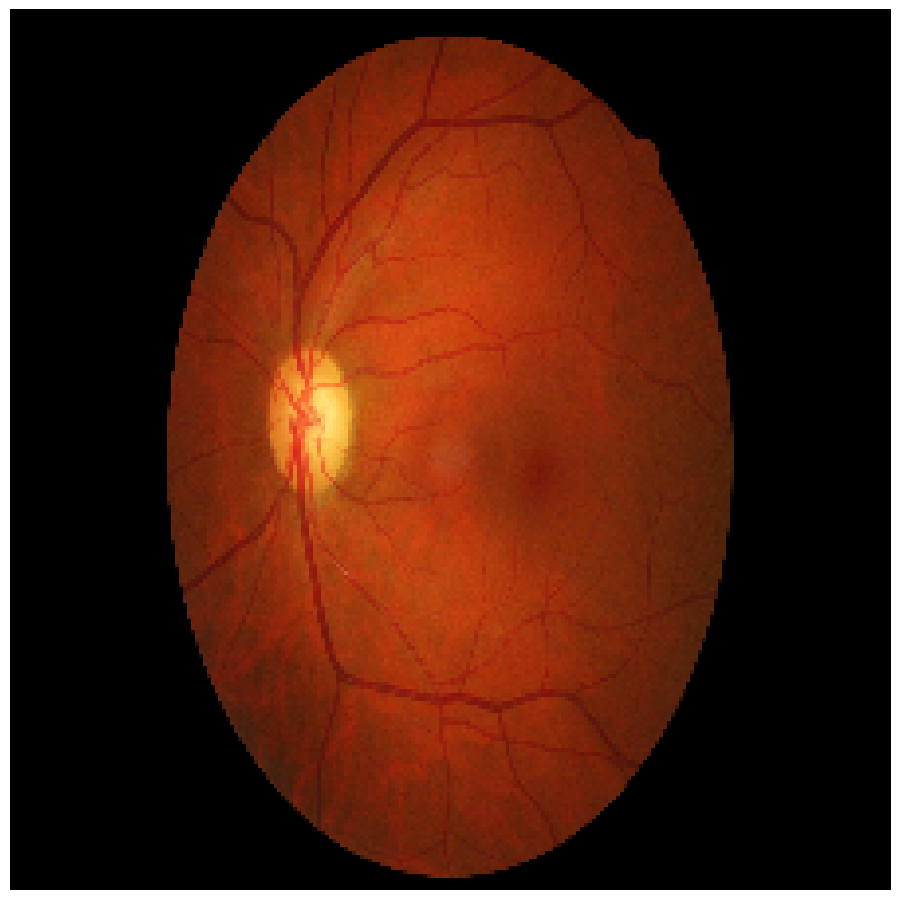

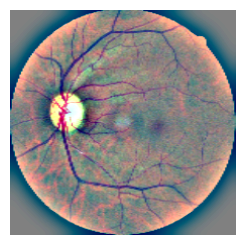

CPU times: user 231 ms, sys: 16.4 ms, total: 247 ms
Wall time: 222 ms


In [9]:
%%time

NUM_SAMP=7
fig = plt.figure(figsize=(25, 16))
path= "/kaggle/working/Test/mild/7158_left.png"
image = cv2.imread(path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_preprocess = load_ben_color(image_rgb)
print(image_preprocess.shape)
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis
plt.show()
plt.subplot(1,2,2)
plt.imshow(image_preprocess)
plt.axis('off')  # Hide axis
plt.show()



**We can see with cropping that important information is much clearer to see with sigmaX = 10.
Let's apply this method to the entire dataset**

In [17]:
# Directory with original images
original_images_dir = "/kaggle/working/Train"
save_count = 0
# Directory to save the processed images
processed_images_dir = "/kaggle/working/ProcessedTrain"
os.makedirs(processed_images_dir, exist_ok=True)
files=[f for f in os.listdir(original_images_dir)]
print(files)
for file in files:
    file_path = os.path.join(original_images_dir, file)
    image_files = [f for f in os.listdir(file_path) if f.endswith(".png")]

# Counter to limit the number of saved images
    

    for image_file in image_files:
    # Load the original image
        image_path = os.path.join(file_path, image_file)
        image = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Apply the processing function
        processed_image = load_ben_color(image_rgb)
    
    # Save the processed image
        save_path_f = os.path.join(processed_images_dir, file)
        save_path = os.path.join(save_path_f, image_file)
        os.makedirs(save_path_f, exist_ok=True)


        cv2.imwrite(save_path, processed_image)
    
        save_count += 1

print(f"{save_count} images processed and saved.")


['moderate', 'proliferative', 'severe', 'no_DR', 'mild']
44453 images processed and saved.


***showing the results after preprocessing the dataset**

(224, 224, 3)


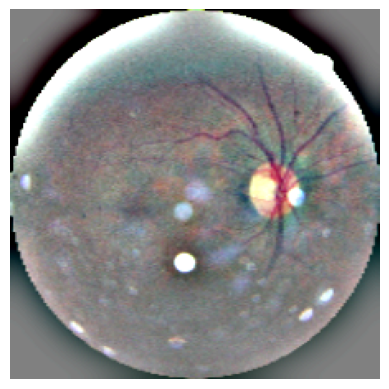

In [10]:
image_path= "/kaggle/working/ProcessedTrain/moderate/33337_right.png"
image = cv2.imread(image_path)
print(image.shape)
plt.axis('off')
plt.imshow(image)
plt.show()

In [4]:
data_dir_pre = '/kaggle/working/ProcessedTrain'
print(data_dir_pre)

/kaggle/working/ProcessedTrain


In [5]:
img_height,img_width=224,224
batch_size=32
train_ds_pre = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_pre,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)




Found 44453 files belonging to 5 classes.
Using 35563 files for training.


In [6]:
val_ds_pre = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_pre,
  validation_split=0.2,
  subset="validation",
  seed=12,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 44453 files belonging to 5 classes.
Using 8890 files for validation.


**Now the dataset is preprocessed and we have a cropped and more clear images that reflects more details. Let's explore if that gives better results !**

# Building the model

* **RESNET-50**

In [24]:
resnet_50_pre = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_50_pre.add(pretrained_model)
resnet_50_pre.add(Flatten())
resnet_50_pre.add(Dense(512, activation='relu'))
resnet_50_pre.add(Dense(512, activation='relu'))
resnet_50_pre.add(Dense(5, activation='softmax'))

94765736/94765736 [==============================] - 4s 0us/step


In [25]:
resnet_50_pre.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrap  (None, 2048)              0         
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (None, 512)               1049088   
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (None, 512)               262656    
 apper)                                                          
                                                                 
 module_wrapper_3 (ModuleWr  (None, 5)                 2565      
 apper)                                                 

In [30]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [32]:
resnet_50_pre.compile(optimizer=keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [33]:
# Assuming 'train_ds' is a tf.data.Dataset object

# Create an iterator to access the dataset
iterator = iter(train_ds_pre)

# Get a batch of data
batch_data = next(iterator)

# Access an image and its corresponding label from the batch
image_tensor = batch_data[0][0]  # Assuming the images are the first element in the batch
label = batch_data[1][0]  # Assuming the labels are the second element in the batch

# Print the label
print("Label:", label.numpy())

# Print the tensor values of the image
print("Image Tensor:")
print(image_tensor.numpy())


Label: 3
Image Tensor:
[[[124. 124. 124.]
  [124. 128. 124.]
  [128. 132. 128.]
  ...
  [128. 124. 128.]
  [128. 124. 128.]
  [128. 124. 128.]]

 [[124. 124. 124.]
  [124. 128. 124.]
  [128. 132. 128.]
  ...
  [128. 124. 128.]
  [128. 124. 128.]
  [128. 124. 128.]]

 [[124. 124. 124.]
  [124. 128. 124.]
  [128. 132. 124.]
  ...
  [128. 124. 128.]
  [128. 124. 128.]
  [128. 124. 128.]]

 ...

 [[124. 124. 128.]
  [128. 124. 128.]
  [128. 124. 128.]
  ...
  [112. 108. 120.]
  [112. 112. 120.]
  [120. 120. 120.]]

 [[128. 124. 128.]
  [128. 124. 128.]
  [128. 124. 128.]
  ...
  [116. 112. 120.]
  [112. 112. 120.]
  [120. 120. 120.]]

 [[128. 128. 128.]
  [128. 128. 124.]
  [128. 128. 120.]
  ...
  [116. 112. 120.]
  [112. 108. 120.]
  [116. 116. 120.]]]


In [37]:
epochs=8
history = resnet_50_pre.fit(
  train_ds_pre,
  validation_data=val_ds_pre,
  epochs=epochs
)

Epoch 1/8
1112/1112 [==============================] - 82s 74ms/step - loss: 0.8189 - accuracy: 0.6693 - val_loss: 0.8518 - val_accuracy: 0.6614
Epoch 2/8
1112/1112 [==============================] - 82s 74ms/step - loss: 0.7842 - accuracy: 0.6837 - val_loss: 0.8206 - val_accuracy: 0.6782
Epoch 3/8
1112/1112 [==============================] - 82s 73ms/step - loss: 0.7561 - accuracy: 0.6939 - val_loss: 0.7824 - val_accuracy: 0.6922
Epoch 4/8
1112/1112 [==============================] - 82s 73ms/step - loss: 0.7217 - accuracy: 0.7100 - val_loss: 0.8427 - val_accuracy: 0.6673
Epoch 5/8
1112/1112 [==============================] - 82s 74ms/step - loss: 0.7024 - accuracy: 0.7161 - val_loss: 0.7802 - val_accuracy: 0.6998
Epoch 6/8
1112/1112 [==============================] - 82s 74ms/step - loss: 0.6770 - accuracy: 0.7268 - val_loss: 0.7594 - val_accuracy: 0.7064
Epoch 7/8
1112/1112 [==============================] - 82s 74ms/step - loss: 0.6507 - accuracy: 0.7361 - val_loss: 0.7343 - val_ac

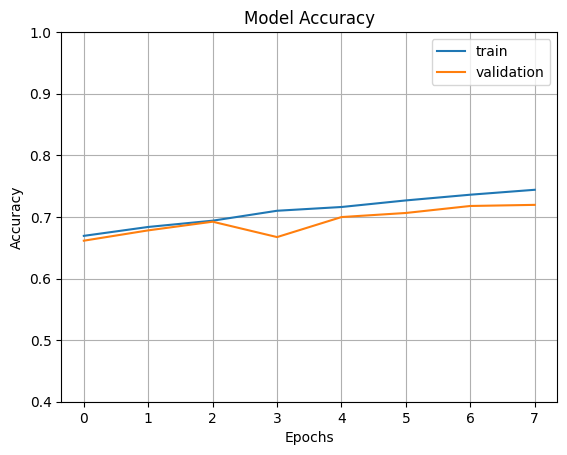

In [38]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

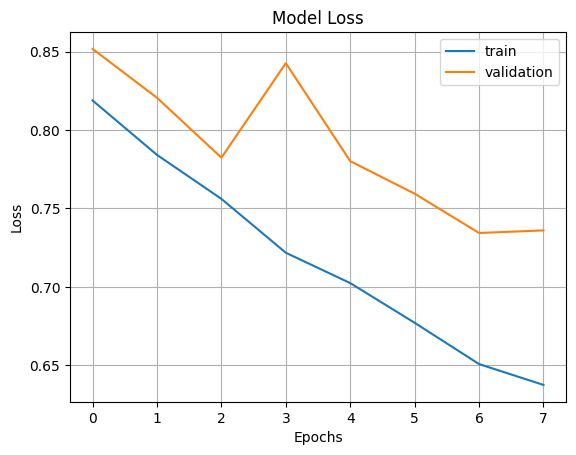

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [14]:
image=cv2.imread("/kaggle/input/diabetes-retinopathy/FOLD 1/TEST/moderate/1002_right.png")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 224, 224, 3)


1/1 [==============================] - 0s 24ms/step
[[2.8350295e-02 8.5272893e-02 8.8618511e-01 1.4300729e-09 1.9175599e-04]]


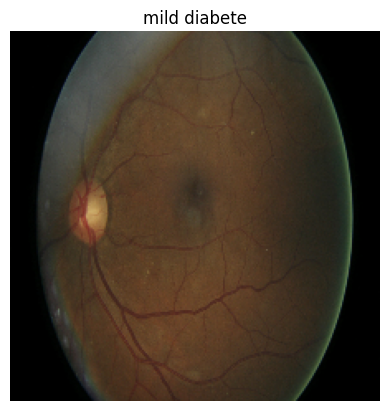

The predicted class is no_DR


In [48]:
pred=resnet_50_pre.predict(image)
print(pred)
plt.imshow(cv2.cvtColor(image[0], cv2.COLOR_BGR2RGB))
plt.title("mild diabete")
plt.axis("off")
plt.show()
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)


**Save the model for future use**

In [ ]:
resnet_model.save("/kaggle/working/resnet-50")

* # VGG19

In [7]:
VGG19_final = Sequential()
pretrained_model_VGG19 =keras.applications.VGG19(
                   include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model_VGG19.layers:
        layer.trainable=False

VGG19_final.add(pretrained_model_VGG19)
VGG19_final.add(Flatten())
VGG19_final.add(Dense(512, activation='relu'))
VGG19_final.add(Dense(512, activation='relu'))
VGG19_final.add(Dense(5, activation='softmax'))

80134624/80134624 [==============================] - 0s 0us/step


In [8]:
VGG19_final.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 module_wrapper (ModuleWrap  (None, 512)               0         
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (None, 512)               262656    
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (None, 512)               262656    
 apper)                                                          
                                                                 
 module_wrapper_3 (ModuleWr  (None, 5)                 2565      
 apper)                                                 

In [9]:
VGG19_final.compile(optimizer=keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
epochs=10
history_VGG19 = VGG19_final.fit(
  x=train_ds_pre,
  validation_data=val_ds_pre,
  epochs=epochs
)

Epoch 1/10
1112/1112 [==============================] - 111s 100ms/step - loss: 1.1275 - accuracy: 0.5362 - val_loss: 1.1590 - val_accuracy: 0.5368
Epoch 2/10
1112/1112 [==============================] - 111s 100ms/step - loss: 1.1224 - accuracy: 0.5396 - val_loss: 1.1338 - val_accuracy: 0.5462
Epoch 3/10
1112/1112 [==============================] - 111s 100ms/step - loss: 1.1097 - accuracy: 0.5443 - val_loss: 1.2639 - val_accuracy: 0.5030
Epoch 4/10
1112/1112 [==============================] - 111s 100ms/step - loss: 1.1053 - accuracy: 0.5480 - val_loss: 1.1782 - val_accuracy: 0.5123
Epoch 5/10
1112/1112 [==============================] - 111s 100ms/step - loss: 1.1345 - accuracy: 0.5351 - val_loss: 1.1917 - val_accuracy: 0.5210
Epoch 6/10
1112/1112 [==============================] - 111s 100ms/step - loss: 1.1102 - accuracy: 0.5451 - val_loss: 1.1203 - val_accuracy: 0.5415
Epoch 7/10
1112/1112 [==============================] - 112s 100ms/step - loss: 1.0896 - accuracy: 0.5518 - val_

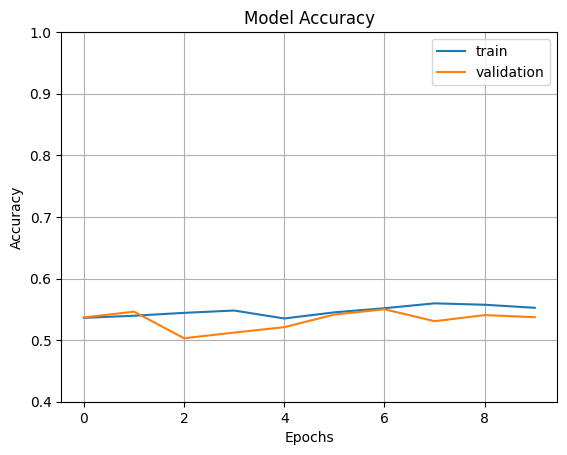

In [15]:
fig1 = plt.gcf()
plt.plot(history_VGG19.history['accuracy'])
plt.plot(history_VGG19.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

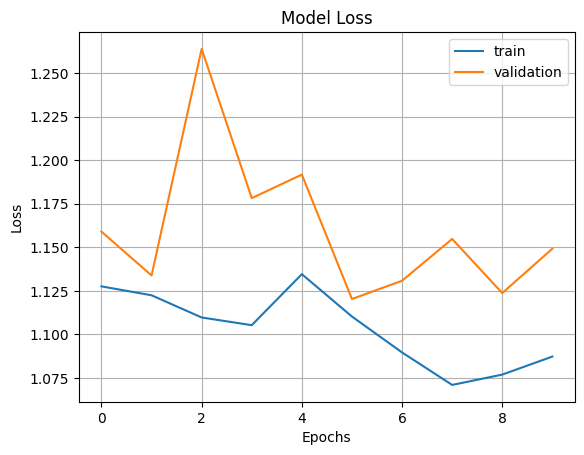

In [16]:
plt.plot(history_VGG19.history['loss'])
plt.plot(history_VGG19.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
image=cv2.imread("/kaggle/input/diabetes-retinopathy/FOLD 1/TEST/moderate/1002_right.png")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

In [ ]:
pred=VGG19.predict(image)
print(pred)
plt.imshow(cv2.cvtColor(image[0], cv2.COLOR_BGR2RGB))
plt.title("mild diabete")
plt.axis("off")
plt.show()
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)


In [ ]:
resnet_model.save("/kaggle/working/VGG19")

**=> So, it's clear that the RESNET-50 model gives better results and works well on this dataset. For the next part, we will be using the RESNET-50 as a main model**

# II - FEDERATED LEARNING

**First, we need to install the tensorflow federated**

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
!sudo apt update
!sudo apt install python3-dev python3-pip -y
print("hello world")
!python3 -m venv venv
!source "venv/bin/activate"
!pip install --upgrade "pip"
!pip install --upgrade tensorflow-federated 
!python -c "import tensorflow_federated as tff; print(tff.federated_computation(lambda: 'Hello World')())"

Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:2 https://packages.cloud.google.com/apt gcsfuse-focal InRelease [1225 B]   
Get:3 https://packages.cloud.google.com/apt cloud-sdk InRelease [6361 B]       
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1581 B]
Get:5 https://packages.cloud.google.com/apt google-fast-socket InRelease [5015 B]0m
Hit:6 http://archive.ubuntu.com/ubuntu focal InRelease           
Get:7 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:8 https://packages.cloud.google.com/apt gcsfuse-focal/main amd64 Packages [21.0 kB]
Get:9 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [29.8 kB]
Get:10 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [1199 kB]
Get:11 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [3536 kB]
Get:12 https://packages.cloud.google.com/apt cloud-sdk/main amd64 Packages [629 kB

In [3]:
import tensorflow_federated as tff

np.random.seed(0)
tff.federated_computation(lambda: 'Hello, World!')()

2024-04-23 22:14:33.333253: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-23 22:14:33.333340: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-23 22:14:33.333380: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


4


I0000 00:00:1713910478.580146     790 servers.cc:71] TFF ExecutorService started, listening on [::]:37059


'b\'b"b\\\'Hello, World!\\\'"\''

* **Create the client data**

**Define a function to load and preprocess an image**

In [3]:
def load_and_preprocess_image(image_path, label):
  # Load the image from the file path.
  image = tf.io.read_file(image_path)

  # Decode the image as a JPEG.
  image = tf.image.decode_png(image, channels=3)

  # Resize the image to a fixed size.
  image = tf.image.resize(image, [224, 224])

  # Normalize the pixel values between 0 and 1.
  image = image / 255.0

  # Return the image and label.
  return image, label

**Create a list of clients and their corresponding tf_fn functions**

In [4]:
import tensorflow as tf

def get_image_paths_and_labels(class_folder_path):
    """
  Gets the list of image paths and labels for a given class folder.

  Args:
    class_folder_path: The path to the class folder.

  Returns:
    A tuple of two lists:
      - image_paths: A list of image paths.
      - labels: A list of labels.
    """

  # Get the list of image file paths in the class folder.
    image_paths = tf.io.gfile.glob(f'{class_folder_path}/*.jpg')

  # Extract the label from the class folder name.
    label = class_folder_path.split('/')[-1]

  # Create a list of labels with the same length as the list of image paths.
    labels = [label] * len(image_paths)

    return image_paths, labels

In [5]:
clients_and_tf_fns = []
class_folders = tf.io.gfile.listdir('/kaggle/working/ProcessedTrain')
client_id=[]
# For each class folder...
for class_folder in class_folders:
    class_folder_path = f'/kaggle/working/ProcessedTrain/{class_folder}'
    # Get the list of image paths and labels for the class.
    image_paths, labels = get_image_paths_and_labels(class_folder)

    # Create a `tf_fn` function for the class.
    tf_fn = lambda: tf.data.Dataset.from_tensor_slices((
      tf.map_fn(load_and_preprocess_image, (image_paths, labels)),
      labels
    ))
    client_id.append(class_folder)
  # Add the client and `tf_fn` function to the list.
    clients_and_tf_fns.append((class_folder, tf_fn))

In [6]:
def serialize_dataset(client_id, dataset):
  # Create a temporary directory to store the serialized dataset.
    temp_dir = tempfile.mkdtemp()

  # Serialize the dataset to a TFRecord file in the temporary directory.
    serialized_dataset_path = os.path.join(temp_dir, f"{client_id}.tfrecord")
    tf.data.experimental.save(dataset, serialized_dataset_path)

  # Return the path to the serialized dataset file.
    return serialized_dataset_path
# Create the federated dataset.
federated_dataset = tff.simulation.datasets.ClientData.from_clients_and_tf_fn(
    clients_and_tf_fns,
    serializable_dataset_fn=lambda client_id, dataset: serialize_dataset(client_id, dataset)
)

TypeError: <lambda>() missing 1 required positional argument: 'dataset'

In [7]:
train_dir = '/kaggle/working/ProcessedTrain'
NUM_CLASSES = 5
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
IMG_SHAPE = IMG_SIZE + (3,)
def normalize_image(image, label):
    # Convert the pixel values to floats and scale them to the range [0, 1]
    image = tf.cast(image, tf.float32) / 255.0
    return image, label
#tensorflow_federated requires that the training data be unified into an OrderedDict ordered dictionary format, and "x" and "y" are displayed and marked.
def map_fn(image_batch,labels_batch):return collections.OrderedDict(x=image_batch,y=labels_batch)
#Randomly generate 100 client data sets to prepare for selection during training
clients_ids = range(50)

def create_client_dataset_fn(str):
    train_dataset = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                        shuffle=True,
                                                                        seed=int(str),
                                                                        validation_split=0.4,
                                                                        subset="training",
                                                                        image_size=IMG_SIZE,
                                                                        batch_size=BATCH_SIZE)
    #train_dataset = train_dataset.map(normalize_image)
    return train_dataset.map(map_fn).prefetch(tf.data.experimental.AUTOTUNE)



In [8]:
clients_dataset = tff.simulation.datasets.ClientData.from_clients_and_tf_fn(clients_ids,create_client_dataset_fn)

Found 44453 files belonging to 5 classes.
Using 26672 files for training.


In [9]:
#Each federated learning randomly generates data for num_clients clients. In this study, there are 10 clients.

def make_random_federated_data(client_data, num_clients):
    random_clientids = random.sample(client_data.client_ids, num_clients)
    return [
        client_data.create_tf_dataset_for_client(x)
        for x in random_clientids
    ]
# input_spec records the format and shape of the training data as important parameters of the model
data_sample = make_random_federated_data(clients_dataset,3)

Found 44453 files belonging to 5 classes.
Using 26672 files for training.
Found 44453 files belonging to 5 classes.
Using 26672 files for training.
Found 44453 files belonging to 5 classes.
Using 26672 files for training.


**Building The federated learning Dataset**

In [15]:
# Define the path to the directory containing your dataset
data_dir = '/kaggle/working/ProcessedTrain'

# List all the class folders (assuming each folder name corresponds to a class)
class_folders = [folder for folder in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, folder))]

# Define a function to load images from a class folder
def load_images(class_folder):
    class_path = os.path.join(data_dir, class_folder)
    file_paths = [os.path.join(class_path, file) for file in os.listdir(class_path) if file.endswith('.jpg') or file.endswith('.png')]
    images = [tf.io.read_file(file_path) for file_path in file_paths]
    return images

# Define a function to create a federated dataset from a list of images
def create_federated_dataset(images):
    dataset = tf.data.Dataset.from_tensor_slices(images)
    return [dataset]

# Create client datasets for each class
client_data = tff.simulation.datasets.ClientData.from_clients_and_tf_fn(
    client_ids=class_folders,
    create_tf_dataset_fn = lambda client_id: create_federated_dataset(load_images(client_id))
)

# Convert client data to federated data
federated_data = tff.simulation.datasets.TestClientData(client_data)

TypeError: ClientData.from_clients_and_tf_fn() got an unexpected keyword argument 'create_tf_dataset_fn'

* **Define the model using Keras**

**This is the main model that have been used, but due to computation issues, we will use a simpler model for faster training**

In [31]:
input_spec = data_sample[0].element_spec
def create_keras_model():
    resnet_50_pre = Sequential()

    pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
    for layer in pretrained_model.layers:
        layer.trainable=False

    resnet_50_pre.add(pretrained_model)
    resnet_50_pre.add(Flatten())
    resnet_50_pre.add(Dense(512, activation='relu'))
    resnet_50_pre.add(Dense(512, activation='relu'))
    resnet_50_pre.add(Dense(5, activation='softmax'))
    return resnet_50_pre

# Create a TFF model
def model_fn():
    keras_model = create_keras_model()
    return tff.learning.models.from_keras_model(
        keras_model,
        input_spec=input_spec,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )
#use_experimental_simulation_loop = True

**This is the model that will be used in the rest of process**

In [11]:
input_spec = data_sample[0].element_spec
def create_keras_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.experimental.preprocessing.Rescaling(1. / 255, input_shape=IMG_SHAPE),
        tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES)])
    return model


def model_fn():
    keras_model = create_keras_model()
    return tff.learning.models.from_keras_model(
      keras_model,
      input_spec=input_spec,
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
  )

* **Define the federated training process:**

In [33]:
# fed_avg = tff.learning.build_federated_averaging_process(
#     model_fn,
#     client_optimizer_fn=lambda:tf.keras.optimizers.Adam(),
#     server_optimizer_fn=lambda:tf.keras.optimizers.Adam(),
#     use_experimental_simulation_loop = True # Enable multi-GPU parallel learning
# )

'fed_avg = tff.learning.build_federated_averaging_process(\n    model_fn,\n    client_optimizer_fn=lambda:tf.keras.optimizers.Adam(),\n    server_optimizer_fn=lambda:tf.keras.optimizers.Adam(),\n    use_experimental_simulation_loop = True #使能多GPU并行学习\n)'

In [12]:
# Create a federated averaging process

iterative_process = tff.learning.algorithms.build_weighted_fed_avg(
    model_fn,
    client_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=0.01),
    server_optimizer_fn=lambda:tf.keras.optimizers.Adam(),
    
)


* **Run federated training:**

In [13]:
print(iterative_process.initialize.type_signature.formatted_representation())

( -> <
  global_model_weights=<
    trainable=<
      float32[3,3,3,16],
      float32[16],
      float32[3,3,16,32],
      float32[32],
      float32[3,3,32,64],
      float32[64],
      float32[50176,128],
      float32[128],
      float32[128,128],
      float32[128],
      float32[128,5],
      float32[5]
    >,
    non_trainable=<>
  >,
  distributor=<>,
  client_work=<>,
  aggregator=<
    value_sum_process=<>,
    weight_sum_process=<>
  >,
  finalizer=<
    int64,
    float32[3,3,3,16],
    float32[3,3,3,16],
    float32[16],
    float32[16],
    float32[3,3,16,32],
    float32[3,3,16,32],
    float32[32],
    float32[32],
    float32[3,3,32,64],
    float32[3,3,32,64],
    float32[64],
    float32[64],
    float32[50176,128],
    float32[50176,128],
    float32[128],
    float32[128],
    float32[128,128],
    float32[128,128],
    float32[128],
    float32[128],
    float32[128,5],
    float32[128,5],
    float32[5],
    float32[5]
  >
>@SERVER)


In [14]:
# Initialize the federated averaging process
state = iterative_process.initialize()

I0000 00:00:1713910843.771317     821 session_provider.cc:108] Found devices: [/physical_device:CPU:0]
I0000 00:00:1713910843.771362     821 session_provider.cc:124] Skipping device: [/physical_device:CPU:0]
I0000 00:00:1713910843.771380     821 session_provider.cc:127] Found:
	0 GPUs
	0 TPUS
in total


In [15]:
state, metrics = iterative_process.next(state, make_random_federated_data(clients_dataset,3))
print(f'Round 1: {metrics}')

Found 44453 files belonging to 5 classes.
Using 26672 files for training.
Found 44453 files belonging to 5 classes.
Using 26672 files for training.
Found 44453 files belonging to 5 classes.
Using 26672 files for training.


I0000 00:00:1713911555.692423    1175 servers.cc:71] TFF ExecutorService started, listening on [::]:34245


KeyboardInterrupt: 

I0000 00:00:1713911561.030957    1188 session_provider.cc:108] Found devices: [/physical_device:CPU:0]
I0000 00:00:1713911561.030997    1188 session_provider.cc:124] Skipping device: [/physical_device:CPU:0]
I0000 00:00:1713911561.031004    1188 session_provider.cc:127] Found:
	0 GPUs
	0 TPUS
in total


In [18]:
# Run federated training for a number of rounds
NUM_ROUNDS = 20
for round_num in range(1,NUM_ROUNDS):
    print(f'Round {round_num}: {metrics}')
    state, metrics = iterative_process.next(state, make_random_federated_data(clients_dataset,3))

    # Print metrics for evaluation
    print(f'Round {round_num}: {metrics}')


Round 2: OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('sparse_categorical_accuracy', 0.29329735), ('loss', 1.5447791), ('num_examples', 13338), ('num_batches', 417)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])
Found 44453 files belonging to 5 classes.
Using 4446 files for training.
Found 44453 files belonging to 5 classes.
Using 4446 files for training.
Found 44453 files belonging to 5 classes.
Using 4446 files for training.


I0000 00:00:1713018563.396913    1334 session_provider.cc:108] Found devices: [/physical_device:CPU:0]
I0000 00:00:1713018563.396948    1334 session_provider.cc:124] Skipping device: [/physical_device:CPU:0]
I0000 00:00:1713018563.396951    1334 session_provider.cc:127] Found:
	0 GPUs
	0 TPUS
in total


Round 2: OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('sparse_categorical_accuracy', 0.32875994), ('loss', 1.4992088), ('num_examples', 13338), ('num_batches', 417)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])
Round 3: OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('sparse_categorical_accuracy', 0.32875994), ('loss', 1.4992088), ('num_examples', 13338), ('num_batches', 417)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])
Found 44453 files belonging to 5 classes.
Using 4446 files for training.
Found 44453 files belonging to 5 classes.
Using 4446 files for training.
Found 44453 files belonging to 5 classes.
Using 4446 files for training.
Round 3: OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([

In [ ]:
# Run federated training for a number of rounds
NUM_ROUNDS = 20
for round_num in range(1,NUM_ROUNDS):
    
    state, metrics = iterative_process.next(state, make_random_federated_data(clients_dataset,3))

    # Print metrics for evaluation
    print(f'Round {round_num}: {metrics}')

Found 44453 files belonging to 5 classes.
Using 26672 files for training.
Found 44453 files belonging to 5 classes.
Using 26672 files for training.
Found 44453 files belonging to 5 classes.
Using 26672 files for training.
Round 1: OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('sparse_categorical_accuracy', 0.3224605), ('loss', 1.4965764), ('num_examples', 80016), ('num_batches', 2502)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])
Found 44453 files belonging to 5 classes.
Using 26672 files for training.
Found 44453 files belonging to 5 classes.
Using 26672 files for training.
Found 44453 files belonging to 5 classes.
Using 26672 files for training.
Round 2: OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('sparse_categorical_accuracy', 0.35474154), ('loss', 1.4593427), ('num_examples', 80016), ('num_batches', 2502)]))]))

* **Evaluate the trained model:** 

In [ ]:

evaluation = tff.learning.build_federated_evaluation(model_fn)
test_metrics = evaluation(state.model, test_data)
print(f'Test metrics: {test_metrics}')


 In this project, we proposed a federated learning approach across multiple healthcare centers. We simulated this distribution by splitting a dataset among multiple centers and studied the model’s performance through multiple rounds of training. Even though the simulation results weren't really good enough, we aim to improve the results and the implementation in the upcoming work. However, we suggest further investigation into the influence of the number of centers on accuracy, as well as the optimal number of training rounds required for excellent precision, among other factors.
 Finally, we would like to emphasize that this study is just a starting point for anyone looking to explore the vast and exciting world of federated learning and its applications in the medical field.